### Sentiment Analysis and NLP

[Data Source](https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news)

In [131]:
import pandas as pd

In [132]:
df = pd.read_csv('data/all-data.csv', encoding='latin-1', header = None)

In [133]:
df.columns = ['sentiment', 'heading']

In [134]:
df.head()

,sentiment,heading
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [135]:
df['sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int64

In [136]:
#convert our headings to numeric arrays
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [137]:
cvect = CountVectorizer(max_features=1000, stop_words = 'english')

In [138]:
X = cvect.fit_transform(df['heading'])

In [139]:
X

<4846x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 38296 stored elements in Compressed Sparse Row format>

In [140]:
dtm = pd.DataFrame(X.toarray(), columns = cvect.get_feature_names())
dtm.head()

,00,000,01,10,100,11,12,13,14,15,...,works,world,worldwide,worth,www,x20ac,year,years,yesterday,yit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Building a Model

- `LogisticRegression`, `RandomForestClassifier`, `keras_classifier`

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from keras.wrappers.scikit_learn import KerasClassifier

In [142]:
lgr = LogisticRegression()
forest = RandomForestClassifier()
boost = AdaBoostClassifier()

In [143]:
def sentimenter(x):
    if x == 'negative': 
        return 0
    elif x == 'neutral':
        return 1
    else:
        return 2

In [144]:
y = df['sentiment'].apply(sentimenter)

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [147]:
lgr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
lgr.score(X_test, y_test)

0.7466996699669967

In [149]:
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7475247524752475

In [150]:
boost.fit(X_train, y_train)

AdaBoostClassifier()

In [151]:
boost.score(X_test, y_test)

0.740924092409241

In [152]:
from sklearn.dummy import DummyClassifier

In [153]:
dum = DummyClassifier()
dum.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier()

In [154]:
dum.score(X_test, y_test)

0.4570957095709571

### Pipeline and Tfidf

In [155]:
from sklearn.pipeline import make_pipeline

In [156]:
pipe = make_pipeline(TfidfVectorizer(max_features = 1000, stop_words = 'english'), LogisticRegression())

In [157]:
X = df['heading']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [159]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=1000, stop_words='english')),
                ('logisticregression', LogisticRegression())])

In [160]:
pipe.score(X_test, y_test)

0.7417491749174917

### Trying a Neural Net

In [161]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [162]:
def make_keras():
    model = Sequential()
    model.add(Dense(64, input_shape = (1000,), activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', metrics = ['acc'])
    return model

In [163]:
kclass = KerasClassifier(build_fn=make_keras, epochs = 20)

In [164]:
tfidf = TfidfVectorizer(max_features = 1000, stop_words = 'english')
X_tf = tfidf.fit_transform(X_train)
X_tsf = tfidf.transform(X_test)

In [165]:
model = Sequential()
model.add(Dense(64, input_shape = (1000,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['acc'])

In [166]:
from keras.utils import to_categorical

In [167]:
y = df['sentiment']

In [125]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [126]:
y_train.shape

(3634, 3, 2, 2)

In [180]:
x_train = X_tf.toarray()
x_test = X_tsf.toarray()
#history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 20)

In [181]:
def kclass():
    model = Sequential()
    model.add(Dense(64, input_shape = (1000,), activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', metrics = ['acc'])
    return model

In [182]:
model = KerasClassifier(build_fn=kclass, epochs = 20)

In [184]:
history = model.fit(x_train, y_train)

Epoch 1/20
114/114 [==============================] - 0s 1ms/step - loss: 0.8702 - acc: 0.6098
Epoch 2/20
114/114 [==============================] - 0s 1ms/step - loss: 0.6807 - acc: 0.7146
Epoch 3/20
114/114 [==============================] - 0s 1ms/step - loss: 0.5431 - acc: 0.7823
Epoch 4/20
114/114 [==============================] - 0s 1ms/step - loss: 0.4628 - acc: 0.8099
Epoch 5/20
114/114 [==============================] - 0s 1ms/step - loss: 0.4126 - acc: 0.8272
Epoch 6/20
114/114 [==============================] - 0s 1ms/step - loss: 0.3749 - acc: 0.8531
Epoch 7/20
114/114 [==============================] - 0s 1ms/step - loss: 0.3412 - acc: 0.8663
Epoch 8/20
114/114 [==============================] - 0s 2ms/step - loss: 0.3117 - acc: 0.8839
Epoch 9/20
114/114 [==============================] - 0s 2ms/step - loss: 0.2851 - acc: 0.8921
Epoch 10/20
114/114 [==============================] - 0s 2ms/step - loss: 0.2568 - acc: 0.9053
Epoch 11/20
114/114 [============================

In [175]:
import matplotlib.pyplot as plt

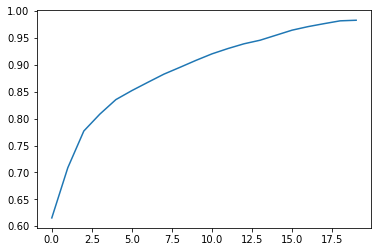

In [176]:
plt.plot(history.history['acc'])

In [186]:
y_preds = model.predict(x_test)

In [187]:
from sklearn.metrics import accuracy_score

In [188]:
accuracy_score(y_test, y_preds)

0.7103960396039604